In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import utils

### Simulating graph with 2 nodes

In [2]:

x = -0.1
0<x<1

False

In [3]:
np.random.seed(100)

B = utils.generate_dag(2, 1, 'ER')
W = utils.generate_W(B)
W

array([[0.        , 0.70505988],
       [0.        , 0.        ]])

In [4]:
alpha = np.array([2, 2])
beta = np.array([0.4, 0.4])
mu = np.array([5, 5])
theta = np.array([8, 8])

In [5]:
import PerturbSCM as scm

In [6]:
sim = scm.PerturbSCM(2, mu=mu, theta=theta, W=W, alpha=alpha, beta=beta)
sim.calibrate_sigmoid()

Calibrating linear aggregation with mean-norm...
Calibration complete.


/Users/luka/Documents/Research/Causal Structure Learning/Projects/Interventional SERGIO/PerturbSCM/PerturbSCM.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  gamma_j = 1 / np.sum(self.W[:,j]) * (np.log(self.alpha[j] / self.beta[j] - 1) - np.log(self.alpha[j] - 1))
/Users/luka/Documents/Research/Causal Structure Learning/Projects/Interventional SERGIO/PerturbSCM/PerturbSCM.py:109: RuntimeWarning: invalid value encountered in scalar multiply
  b_j = - 1 / gamma_j * (np.log(self.alpha[j] - 1) + gamma_j * np.sum(self.W[:,j]))


In [7]:
X=sim.simulate()

<Axes: ylabel='Count'>

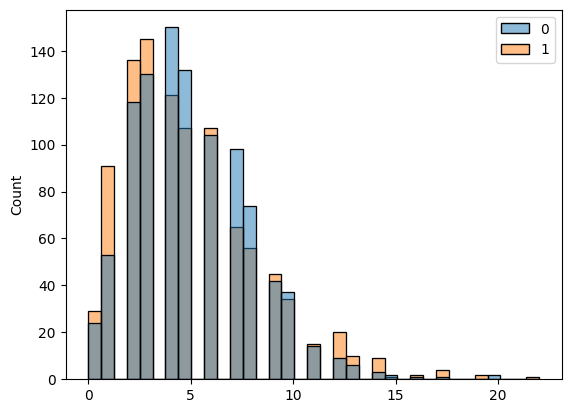

In [8]:
sns.histplot(X)

In [9]:
print(sim.mu)
print(sim.mu * (1 + np.array(sim.mu) / np.array(sim.theta)))

[5 5]
[8.125 8.125]


In [10]:
np.std(X, axis=0) ** 2

array([ 8.420524, 11.031751])

In [11]:
X=sim.simulate(1000)
X_int0 = sim.simulate(1000, intervention_val=[0, -100], intervention_type='deterministic')
X_int1 = sim.simulate(1000, intervention_val=[-1, 0], intervention_type='deterministic')

<Axes: ylabel='Count'>

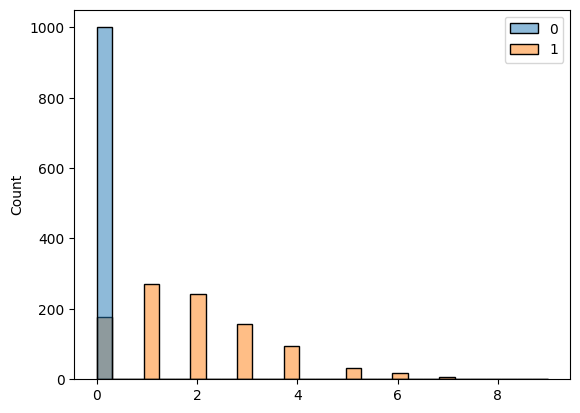

In [12]:
sns.histplot(X_int0)

#### Investigating discrepancy in empirical/simulated variance vs. expected variance given parameters

In [13]:
expected_variace = mu * (1 + mu / theta)
expected_variace 

array([8.125, 8.125])

In [14]:
X=sim.simulate(1000)

In [15]:
np.var(X, axis=0)

array([ 7.688679, 10.966271])

In [16]:
var_reg = np.var(sim.reg_sigmoid(X[:,0] / mu[0] * W[0, 1], 1))

In [17]:
add_var = (mu[0]) ** 2 * var_reg

In [18]:
add_var

2.811510205119823

In [19]:
sim.reg_sigmoid(X[:,0] / mu[0] * W[0, 1], 1)

array([0.60653909, 0.86225186, 0.86225186, 0.72963379, 0.60653909,
       1.6       , 0.72963379, 0.60653909, 1.39346091, 1.13774814,
       1.88235294, 1.13774814, 1.        , 1.39346091, 1.80372119,
       0.86225186, 0.49610149, 0.86225186, 0.86225186, 0.72963379,
       1.        , 1.        , 1.27036621, 1.27036621, 1.        ,
       0.49610149, 0.72963379, 1.        , 0.60653909, 1.13774814,
       1.13774814, 0.72963379, 1.39346091, 1.13774814, 1.27036621,
       1.        , 1.50389851, 0.49610149, 1.39346091, 0.49610149,
       1.27036621, 1.27036621, 0.60653909, 0.60653909, 1.13774814,
       0.60653909, 1.13774814, 0.86225186, 1.39346091, 1.13774814,
       0.86225186, 0.60653909, 1.13774814, 0.49610149, 1.90955189,
       0.72963379, 1.        , 0.86225186, 1.        , 1.6       ,
       0.72963379, 1.27036621, 0.4       , 0.72963379, 0.60653909,
       1.39346091, 0.60653909, 1.        , 1.27036621, 0.86225186,
       1.39346091, 0.72963379, 0.86225186, 0.86225186, 0.72963

#### Testing Sigmoid Calibration for Linear Aggregation with z-norm

In [20]:
sim_z = scm.PerturbSCM(2, mu=mu, theta=theta, W=W, alpha=alpha, beta=beta, agg_type='linear-znorm')
sim_z.calibrate_sigmoid()


Calibrating linear aggregation with z-norm...
Calibration complete.


/Users/luka/Documents/Research/Causal Structure Learning/Projects/Interventional SERGIO/PerturbSCM/PerturbSCM.py:124: RuntimeWarning: divide by zero encountered in scalar divide
  gamma_j = - 1 / w_sum_j * (np.log(self.alpha[j] / self.beta[j] - 1) - np.log(self.alpha[j] - 1))


<Axes: >

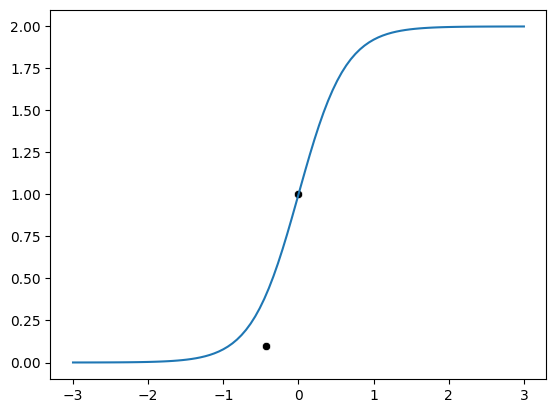

In [21]:
ax = sns.scatterplot(y=[0.1, 1], x=[-mu[0]/(mu[0] * (1 + mu[0] / theta[0])) * W[0,1], 0], color="black")
x = np.linspace(-3, 3, 100)
y = sim_z.reg_sigmoid(x, 1)
sns.lineplot(x=x, y=y)

In [22]:
sim_z.reg_sigmoid(-mu[0]/(mu[0] * (1 + mu[0] / theta[0])) * W[0,1], 1)

0.4

In [23]:
sim.b

[nan, -0.7050598845274294]

#### Checking variance in regulatory function with z-normalisation

In [24]:
# sim_z = scm.PerturbSCM(2, mu=mu, theta=theta, W=W, alpha=alpha, beta=beta, agg_type='linear-znorm')
# sim_z.calibrate_sigmoid()
# X_z = sim_z.simulate()

# doesnt work due to divide by w = 0 (for nodes with no parents) in equation for gamma_j 

Calibrating linear aggregation with mean-norm...
Calibration complete.
Calibrating linear aggregation with mean-norm...
Calibration complete.
Calibrating linear aggregation with mean-norm...
Calibration complete.
Calibrating linear aggregation with mean-norm...
Calibration complete.
Calibrating linear aggregation with mean-norm...
Calibration complete.


/Users/luka/Documents/Research/Causal Structure Learning/Projects/Interventional SERGIO/PerturbSCM/PerturbSCM.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  gamma_j = 1 / np.sum(self.W[:,j]) * (np.log(self.alpha[j] / self.beta[j] - 1) - np.log(self.alpha[j] - 1))
/Users/luka/Documents/Research/Causal Structure Learning/Projects/Interventional SERGIO/PerturbSCM/PerturbSCM.py:109: RuntimeWarning: invalid value encountered in scalar multiply
  b_j = - 1 / gamma_j * (np.log(self.alpha[j] - 1) + gamma_j * np.sum(self.W[:,j]))


<Axes: xlabel='x', ylabel='y'>

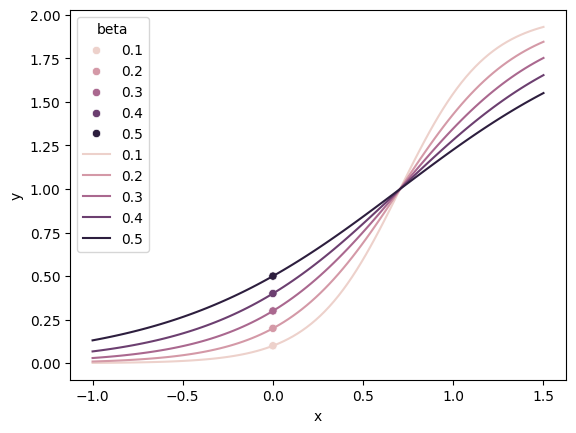

In [73]:
df = pd.DataFrame()

num = 100

x = np.linspace(-1, 1.5, num)

for bta in [0.1, 0.2, 0.3, 0.4, 0.5]:
    temp_sim = scm.PerturbSCM(nnodes=2, mu=mu, theta=theta, W=W, alpha=[2, 2], beta=[bta, bta], agg_type='linear')
    temp_sim.calibrate_sigmoid()
    y = temp_sim.reg_sigmoid(x, 1)

    temp_df = pd.DataFrame({'x' : x, 'y' : y, 'beta' : np.repeat(bta, num)})

    df = pd.concat([df, temp_df])

ax = sns.scatterplot(y=[0.1, 0.2, 0.3, 0.4, 0.5], x=[0, 0, 0, 0, 0], hue=[0.1, 0.2, 0.3, 0.4, 0.5])
sns.lineplot(df, x='x', y='y', hue='beta')

In [54]:
temp_sim = scm.PerturbSCM(nnodes=2, mu=mu, theta=theta, W=W, alpha=[1.5, 1.5], beta=[0.4, 0.4], agg_type='linear')
temp_sim.calibrate_sigmoid()

temp_sim.reg_sigmoid(0, 1)

Calibrating linear aggregation with mean-norm...
Calibration complete.


/Users/luka/Documents/Research/Causal Structure Learning/Projects/Interventional SERGIO/PerturbSCM/PerturbSCM.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  gamma_j = 1 / np.sum(self.W[:,j]) * (np.log(self.alpha[j] / self.beta[j] - 1) - np.log(self.alpha[j] - 1))
/Users/luka/Documents/Research/Causal Structure Learning/Projects/Interventional SERGIO/PerturbSCM/PerturbSCM.py:109: RuntimeWarning: invalid value encountered in scalar multiply
  b_j = - 1 / gamma_j * (np.log(self.alpha[j] - 1) + gamma_j * np.sum(self.W[:,j]))


0.4

In [69]:
X_z = temp_sim.simulate()

np.var(X_z, axis=0)

array([ 8.197984, 11.082191])

### Testing Invariant Causal Prediction

In [32]:
import causalicp as icp

In [41]:
B=utils.generate_dag(10, 20, 'ER')
W=utils.generate_W(B)
mu, theta, alpha, beta = utils.generate_node_params(10)

In [42]:
sim_icp = scm.PerturbSCM(10, mu, theta, W, alpha, beta)
sim_icp.calibrate_sigmoid()
X_coll = []

# observational
X_coll.append(sim_icp.simulate())

int_set = np.repeat(-1, 10)
int_type = 'deterministic'

for i in range(10):
    int_temp = int_set.copy()
    int_temp[i] = 0
    X_coll.append(sim_icp.simulate(n_samp=1000, intervention_val=int_set, intervention_type=int_type))

In [79]:
sets = []

for i in range(10):
    result_temp = icp.fit(X_coll, target=i, alpha=0.05, precompute=True, verbose=False, color=False)
    sets.append(result_temp.accepted_sets)

In [80]:
for i in range(10):
    print(set.intersection(*sets[i]))

set()
set()
set()
set()
set()
set()
set()
set()
set()
set()


<Axes: >

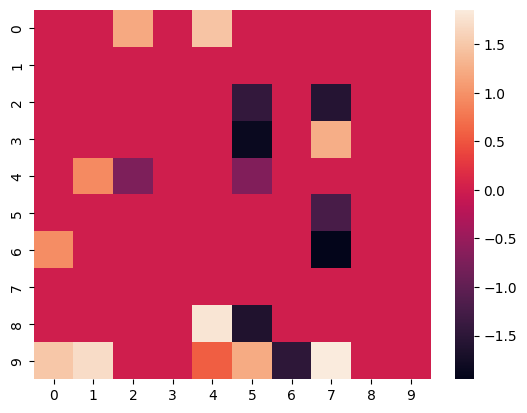

In [81]:
sns.heatmap(W)

#### Investigating variance generated by simulating from single negative binomial distribution

In [1]:
test_mu = 5
test_disp = 8

exp_variance = 5 * (1 + 5 / 8)

In [2]:
exp_variance

8.125

In [3]:
test_var = test_mu * (1 + test_mu / test_disp)
p = test_mu / test_var
n = test_mu ** 2 / (test_var - test_mu)

In [11]:
import numpy as np

test_x = np.random.negative_binomial(n=n, p=p, size=1000)

In [12]:
np.var(test_x)

8.227630999999999